In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF으로 로드

feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header = None, names=['column_index', 'column_name'])

feature_name_df.head(10)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [12]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성하 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [28]:
# 중복된 피처명이 얼마나 있는 조회하기

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()


column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중복된 피처명에 새로운 피처명을 가지는 DataFrame을 반환하는 함수를 생성

In [36]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

train 데이터셋과 test 데이터셋을 불러오기

In [41]:
import pandas as pd
def get_human_dataset():
    # 각 데이터 파일은 공백으로 부리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_nuew_feature_name_df를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name적용

    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names=feature_name)
    X_test= pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+',header=None, names =['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+',header=None, names =['action'])

    # 로드된 학습/테스트 데이터 DataFrame을 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [42]:
# 불러온 학습용 피처 데이터 셋을 살펴보자

print('## 학습피처 데이터셋 info()')
print(X_train.info())

## 학습피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [43]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [46]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


1. DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시 마다 동일한 예측 결과 도출을 위해 random_state를 2021로 설정

dt_clf = DecisionTreeClassifier(random_state=2021)
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred_dt)
print('결정트리 예측 정확도: {0:.4f}'.format(accuracy_dt))


결정트리 예측 정확도: 0.8588


In [52]:
# DecisionTreeClassifier 하이퍼파라미터 추출

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2021, 'splitter': 'best'}


2. GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8, 10 , 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8507
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


max_depth에 다른 평가 데이터 세트의 평균 정확도 수치를 (result) DataFrame생성

In [57]:
# GridSearchCV 객쳐에ㅢ cv_results_ 속성을 DataFrame으로 생성.

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파마리터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.845758
1,8,0.850660
2,10,0.843047
3,12,0.845631
4,16,0.844814
5,20,0.838421
6,24,0.839781


In [61]:
# 테스트 데이터 세트에서 max_depth의 변화에 따른 값을 측정
max_depth = [6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth = depth,random_state=2021)
    dt_clf.fit(X_train, y_train)
    pred_dt = dt_clf.predict(X_test)
    accuracy_dt = accuracy_score(y_test, pred_dt)
    print('max_depth : {0} - 정확도 {1:.4f}'.format(depth, accuracy_dt))

max_depth : 6 - 정확도 0.8544
max_depth : 8 - 정확도 0.8731
max_depth : 10 - 정확도 0.8687
max_depth : 12 - 정확도 0.8690
max_depth : 16 - 정확도 0.8585
max_depth : 20 - 정확도 0.8588
max_depth : 24 - 정확도 0.8588


In [62]:
params = {
    'max_depth' : [ 6, 8, 10 , 12, 16, 20, 24],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.8527
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [66]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy_dt - accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도{0:.4f}'.format(accuracy_dt))

결정 트리 예측 정확도0.8588


<function matplotlib.pyplot.show(close=None, block=None)>

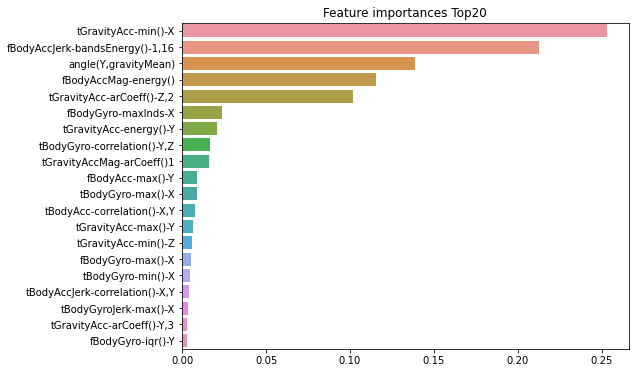

In [67]:
# 결정트리에서 각 피처의 중요도 그래프
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show